In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


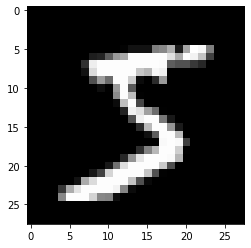

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[0], cmap="gray")

In [3]:
x_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
encoder_input = keras.Input(shape=(28,28,1),name='img')


In [8]:
x=keras.layers.Flatten()(encoder_input) #28 8 28 = 784 will be the ouput shape

In [9]:
encoder_output=keras.layers.Dense(64,activation='relu')(x)

In [10]:
encoder_output.shape

TensorShape([None, 64])

In [11]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [12]:
decoder_input=keras.layers.Dense(784,activation='relu')(encoder_output)

In [13]:
decoder_output=keras.layers.Reshape((28,28,1))(decoder_input)

In [14]:
opt=keras.optimizers.Adam(lr=0.01,decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
autoencoder = keras.Model(encoder_input,decoder_output,name='encoder')

In [16]:
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.compile(opt,loss='mse')

In [18]:
autoencoder.fit(x_train, x_train,epochs=3,batch_size=32,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0230 - val_loss: 0.0206
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0210 - val_loss: 0.0214


In [19]:
example=encoder.predict(x_test[0].reshape(-1,28,28,1))[0]

1/1 [==============================] - 0s 49ms/step


In [20]:
example.shape

(64,)

In [21]:
64/784

0.08163265306122448

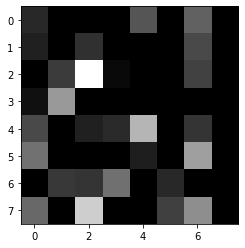

In [22]:
plt.imshow(example.reshape(8,8),cmap='gray')

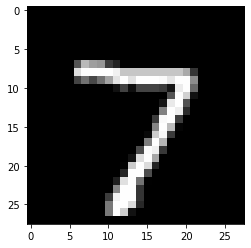

In [23]:
plt.imshow(x_test[0],cmap='gray')

In [24]:
x_test[0].shape

(28, 28)

In [25]:

ae_out=autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

1/1 [==============================] - 0s 37ms/step


In [26]:
ae_out.shape

(28, 28, 1)

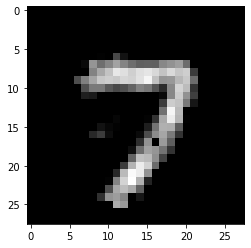

In [27]:
plt.imshow(ae_out.reshape(28,28),cmap='gray')

In [28]:
import random
def add_noise(img, random_chance=5):
  noisy=[]
  for row in img:
    new_row=[]
    for pix in row:
      if random.choice(range(100)) <= random_chance:
        new_val=random.uniform(0,1)
        new_row.append(new_val)
      else:
        new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

In [29]:
noisy = add_noise(x_test[0])

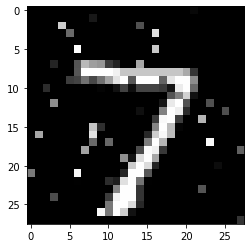

In [30]:
plt.imshow(noisy,cmap='gray')

In [31]:
ae_out=autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]

1/1 [==============================] - 0s 12ms/step


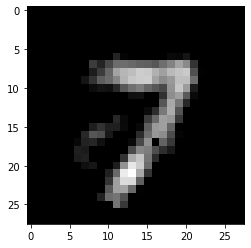

In [32]:
plt.imshow(ae_out.reshape(28,28),cmap='gray')